In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
import math as math
from IPython.display import display, Math

In [2]:
x = sym.symbols('x')
fx = x**3
lim_p= 1.5
lim = sym.limit(fx, x, lim_p)
display(Math('\\lim_{x\\to %g} %s = %g' %(lim_p, sym.latex(fx), lim)))

<IPython.core.display.Math object>

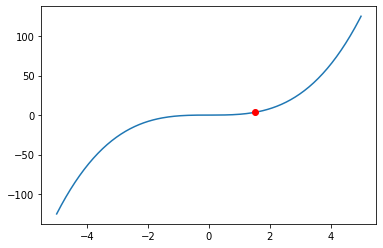

In [3]:
fxx = sym.lambdify(x,fx)
xx=np.linspace(-5,5,200)

plt.plot(xx, fxx(xx))
plt.plot(lim_p, lim, 'ro')


<IPython.core.display.Math object>

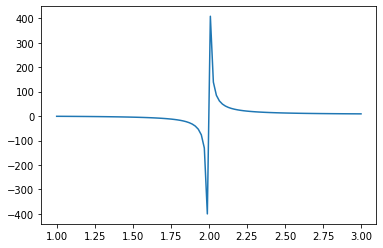

In [4]:
fx = (x**2) / (x-2)
fxx = sym.lambdify(x,fx)
xx = np.linspace(1,3, 102)

lim_pnt = 2 
lim = sym.limit(fx, x, lim_pnt, dir = '-')
lim

plt.plot(xx, fxx(xx))

display(Math('\\lim_{x\\to %g^-} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

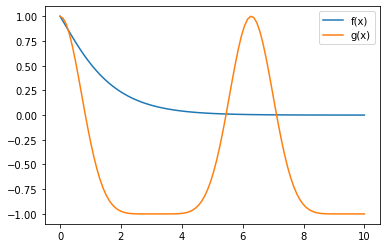

In [5]:
# exercise 
x = sym.symbols('x')
fx = sym.exp(-x) * sym.sqrt(x + 1)
gx = sym.cos(x +sym.sin(x))

fxx = sym.lambdify(x,fx)
gxx = sym.lambdify(x,gx)

xx = np.linspace(0,10, 100)


plt.plot(xx, fxx(xx), label = 'f(x)')
plt.plot(xx, gxx(xx), label = 'g(x)')
plt.legend()
plt.show()

In [6]:
xx = np.linspace(1,10, 100)

lim_pnt = 5
limf = sym.limit(fx, x, lim_pnt)
limg = sym.limit(gx, x, lim_pnt)

hx = fx/gx

limfgx = sym.limit(hx,x,lim_pnt)
limf

sqrt(6)*exp(-5)

In [7]:
limg

cos(sin(5) + 5)

In [8]:
# does lim fx / lim gx = lim fx/gx?

display(Math('\\frac{\\lim_{x\\to %g} f(x)}{\\lim_{x\\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt,lim_pnt,limf,limg,limf/limg)))


# now compute limit of fx/gx
lim_fg = sym.limit(fx/gx,x,lim_pnt)

display(Math('\\lim_{x\\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt,lim_fg)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Piecewise Functions 

In [9]:
from sympy.abc import x
p1=0
p2=-2*x
p3 = x**3/10

# implement conditions
fx=sym.Piecewise((p1, x < 0), (p2,(x>=0) & (x<3)), (p3, x>=10)) #x and limit when x < 0 to evaluate.
fxx = sym.lambdify(x,fx)
xx = np.linspace(-3,5,1000) 


In [10]:
fx

Piecewise((0, x < 0), (-2*x, x < 3), (x**3/10, x >= 10))

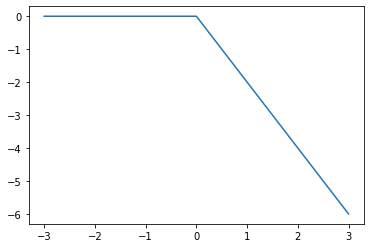

In [11]:
plt.plot(xx, fxx(xx))

In [12]:
from sympy.abc import x
p1 = x**3
p2 = np.log2(x)

gx = sym.Piecewise( (p1, x <= 0), (p2, x > 0))

sym.lambdify(x,gx)

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable log2 method

# Derivatives

In [14]:
# power rule 
x = sym.symbols('x')
fx = x**2 
sym.diff(fx)


2*x

In [15]:
#leibniz
display(Math('f(x) = %s, \\quad \\frac{df}{dx}=%s' %(sym.latex(fx),(sym.latex(sym.diff(fx)) ))))

#lagrange 
display(Math('f(x) = %s, \\quad f\'=%s' %(sym.latex(fx),(sym.latex(sym.diff(fx)) ))))

#newton 
display(Math('f(x) = %s, \\quad \\dot{f}=%s' %(sym.latex(fx),(sym.latex(sym.diff(fx)) ))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

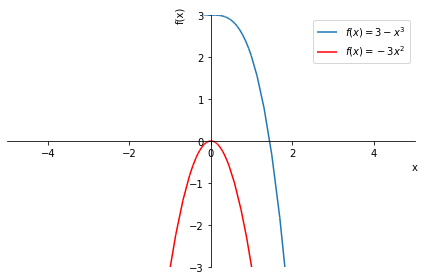

In [16]:
import sympy.plotting.plot as symplot

fx = 3-x**3
p = symplot(fx, (x,-5,5), show = False)
p.extend(symplot(sym.diff(fx), (x,-5,5), show = False))
p[1].line_color = 'r'
p[0].label = '$f(x) = %s$' %sym.latex(fx) 
p[1].label = '$f(x) = %s$' %sym.latex(sym.diff(fx)) 

p.ylim = [-3,3]
p.legend = True
p.show()

In [17]:
fx = 3 + 2*x -5*x**2 + 7*x**4
gx = 4*x**2 + x**5

df = sym.diff(fx)
dg = sym.diff(gx)

dfxg = sym.diff(fx*gx)
dfpg = sym.diff(fx+gx)

fx_a_gx=fx+gx
fx_m_gx=gx*fx

#sym(gx + fx)
#sym.diff(fx) + sym.diff(gx)

In [18]:
# summation rule 
dfpg == df + dg

True

In [19]:
# NOT PRODUCT rule
dfxg == df * dg

False

In [20]:
# Product rule
dfxg == df*gx + fx*dg

True

# Deriv of trig function

In [22]:
q = sym.symbols('q')

print(sym.diff(sym.cos(q)))
print(sym.diff(sym.sin(q)))

-sin(q)
cos(q)


In [28]:
f = sym.cos(q)
for i in range(0,8):
    display(Math('\\frac{d}{dx}%s = %s' %(sym.latex(f), sym.latex(sym.diff(f)))))
    f= sym.diff(f)
    
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

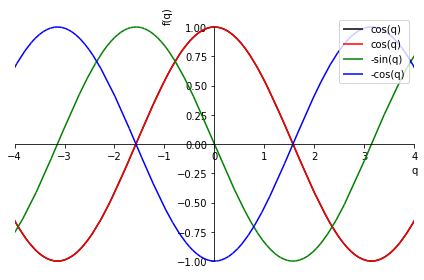

In [35]:
import sympy.plotting.plot as symplot

f= sym.cos(q)
p = symplot(f, show = False, label = sym.latex(f))
cl = 'krgb'
for i in range(0,4):
    if i == 0:
        p = symplot(f, show = False, label = sym.latex(f), line_color = cl[i])
    else: 
        p.extend(symplot(f, show = False, label = sym.latex(f), line_color = cl[i]))
        f= sym.diff(f)

        # add more lines
p.legend = True
p.xlim = [-4,4]
p.show()

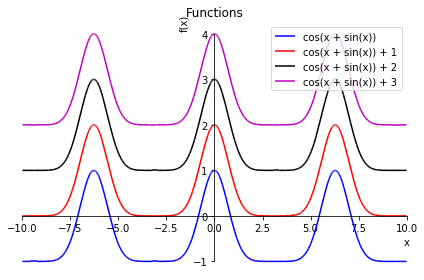

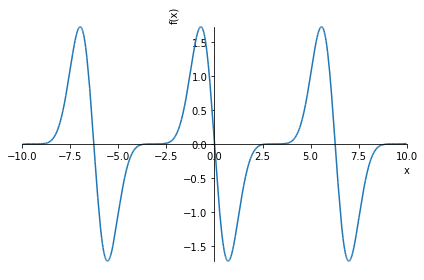

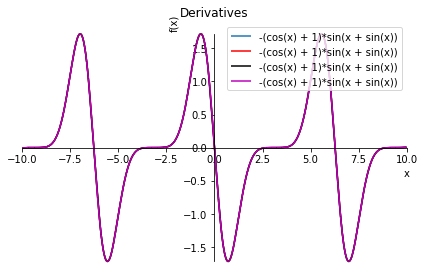

In [46]:
x, a = sym.symbols('x,a')
f = sym.cos(x + sym.sin(x)) + a 
cl = 'brkm'

for ai in range(0,4): 
    if ai == 0:
        p= symplot(f.subs(a, ai), show = False, label = 'a' + str(ai), line_color = cl[0])
    else: 
        p.extend(symplot(f.subs(a, ai), show = False, label = 'a' + str(ai),  line_color = cl[ai]) )

p.title = 'Functions'
p.legend = True
p.show()


for ai in range(0,4): 
    if ai == 0:
        p= symplot(sym.diff(f.subs(a, ai), show = False, label = 'a' + str(ai), line_color = cl[0]))
    else: 
        p.extend(symplot(sym.diff(f.subs(a, ai)), show = False, label = 'a' + str(ai),  line_color = cl[ai])) 

p.title = 'Derivatives'
p.legend = True
p.show()
        

# tangent lines 


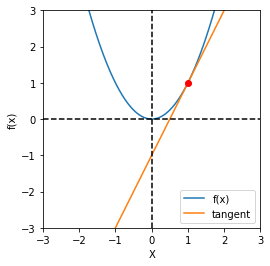

In [60]:
x = sym.symbols('x')

# define function and its derivative
f = x**2
df = sym.diff(f)

# select x point
xa = 1

# define function and derivative values at that point
fa = f.subs(x,xa)
df_a = df.subs(x,xa)

## evaluate function and its derivative
xx     = np.linspace(-2,2,200)
f_fun  = sym.lambdify(x,f)(xx)
df_fun = sym.lambdify(x,df)(xx)

# compute the tangent line
tanline = df_a * (xx - xa) + fa

# plot it!
plt.plot(xx,f_fun,label='f(x)')
plt.plot(xx,tanline,label='tangent')
plt.plot(xa,fa,'ro')

plt.axis('square')
plt.axis([-3,3,-3,3])
ax = plt.gca()
plt.plot(ax.get_xlim(),[0,0],'k--')
plt.plot([0,0],ax.get_xlim(),'k--')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend()

plt.show()

In [63]:
x = sym.symbols('x')

# define function and its derivative
f = x**2
df = sym.diff(f)

i = -2
# select x point
xa = i

# define function and derivative values at that point
fa = f.subs(x,xa)
df_a = df.subs(x,xa)

## evaluate function and its derivative
xx     = np.linspace(-2,2,200)
f_fun  = sym.lambdify(x,f)(xx)
df_fun = sym.lambdify(x,df)(xx)

# compute the tangent line
tanline = df_a * (xx - xa) + fa

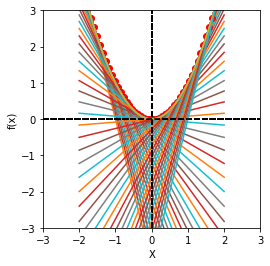

In [66]:
for i in np.linspace(-2,2,50): 
    
    # select x point
    xa = i

    # define function and derivative values at that point
    fa = f.subs(x,xa)
    df_a = df.subs(x,xa)

    ## evaluate function and its derivative
    xx     = np.linspace(-2,2,200)
    f_fun  = sym.lambdify(x,f)(xx)
    df_fun = sym.lambdify(x,df)(xx)

    # compute the tangent line
    tanline = df_a * (xx - xa) + fa
    
    # plot it!
    plt.plot(xx,f_fun,label='f(x)')
    plt.plot(xx,tanline,label='tangent')
    plt.plot(xa,fa,'ro')

    plt.axis('square')
    plt.axis([-3,3,-3,3])
    ax = plt.gca()
    plt.plot(ax.get_xlim(),[0,0],'k--')
    plt.plot([0,0],ax.get_xlim(),'k--')
    plt.xlabel('X')
    plt.ylabel('f(x)')

plt.show()

# Critical points 

In [67]:
from scipy.signal import find_peaks

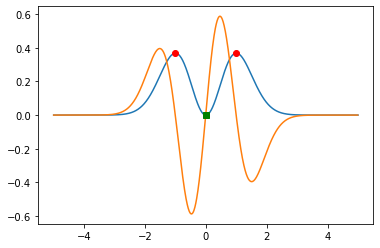

In [77]:
# emperical method
x = np.linspace(-5,5,1001)
fx = x**2 * np.exp(-x**2)

dfx = np.diff(fx)/[x[1] - x[0]]

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

plt.plot(x,fx)
plt.plot(x[0:-1],dfx)
plt.plot(x[localmax], fx[localmax], 'ro')
plt.plot(x[localmin], fx[localmin], 'gs')
plt.show()

In [70]:
localmax = find_peaks(fx)
localmin = find_peaks(-fx)
print(localmax)
print(localmin)

(array([400, 599]), {})
(array([499]), {})


In [80]:
x[0]-x[1]

-0.009999999999999787

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

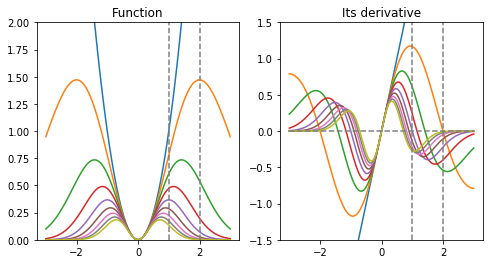

In [87]:
# what values of 'a' give this function a critical point at x=1 or x=2?
a,x = sym.symbols('a,x')

baseexpr = x**2 * sym.exp(-a*x**2)
arange = np.arange(0,2.25,.25)
xrange = np.linspace(-3,3,100)

# setup plots
fig,ax = plt.subplots(1,2)

for ai in arange:
    
    fx = baseexpr.subs(a,ai)
    dfx = sym.diff(fx)
    critpnts = sym.solve( dfx )
    
    # also plot the function in subplot1 and its derivative in subplot2
    ax[0].plot(xrange,sym.lambdify(x,fx)(xrange))
    ax[1].plot(xrange,sym.lambdify(x,dfx)(xrange))
    
    
    if 1 in critpnts:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=1}' %sym.latex(fx)))
    elif 2 in critpnts:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=2}' %sym.latex(fx)))
    else:
        display(Math('\\quad %s\\text{ has NO critical point at x=2.}' %sym.latex(fx)))



# some adjustments to the function plot
ax[0].set_ylim([0,2])
ax[0].set_title('Function')
ax[0].plot([1,1],[0,2],'--',c='gray')
ax[0].plot([2,2],[0,2],'--',c='gray')

# adjustments to the derivative plot
ax[1].set_ylim([-1.5,1.5])
ax[1].plot(xrange[[0,-1]],[0,0],'--',c='gray')
ax[1].plot([1,1],[-1.5,1.5],'--',c='gray')
ax[1].plot([2,2],[-1.5,1.5],'--',c='gray')
# ax[1].set_xlim([.5,2.5])
ax[1].set_title('Its derivative')
fig.set_size_inches(8,4)

plt.show()

# partial derivatives

In [88]:
from sympy.abc import x,y
f = x**2 + x*y**2
display(Math('\\frac{\\partial f}{\\partial x} = %s' %sym.latex(sym.diff(f,x))))
display(Math('\\frac{\\partial f}{\\partial y} = %s' %sym.latex(sym.diff(f,y))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>